In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
from Fun import Employee_Attrition
EA = Employee_Attrition()
df = EA.clean(df)

In [4]:
cat_col = df.select_dtypes(include='object')
num_dis = df[['education','environmentsatisfaction','jobinvolvement','joblevel','jobsatisfaction','relationshipsatisfaction',
           'stockoptionlevel','worklifebalance']]
num_con = df[['age','dailyrate','distancefromhome','hourlyrate','monthlyincome','monthlyrate','numcompaniesworked','percentsalaryhike',
            'totalworkingyears','trainingtimeslastyear','yearsatcompany','yearsincurrentrole','yearssincelastpromotion',
            'yearswithcurrmanager']]

In [5]:
import plotly.express as px
import nbformat

In [9]:
for i in cat_col.columns:
    cross_tab = pd.crosstab(df[i],df['performancerating'])
    cross_tab['Total'] = cross_tab[3]+cross_tab[4]
    cross_tab = cross_tab.sort_values(by='Total',ascending=False)
    fig = px.bar(cross_tab, x = cross_tab.index,y = 'Total',
                 title=i)
    fig.show()

In [19]:
cross_tab = pd.crosstab(df[i],df['performancerating'])
cross_tab['Total'] = cross_tab[3]+cross_tab[4]
cross_tab

performancerating,3,4,Total
worklifebalance,,,
1,66,14,80
2,296,48,344
3,752,141,893
4,130,23,153


In [23]:
df.groupby(['worklifebalance'])['performancerating'].count().reset_index()

,worklifebalance,performancerating
0,1,80
1,2,344
2,3,893
3,4,153


In [17]:
for i in num_dis.columns:
    cross_tab = pd.crosstab(df[i],df['performancerating'])
    cross_tab['Total'] = cross_tab[3]+cross_tab[4]
    cross_tab = cross_tab.sort_values(by='Total',ascending=False)
    fig = px.bar(cross_tab, x = cross_tab.index,y = 'Total',
                 title=i)
    fig.show()

In [6]:
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,yes,travel_rarely,1102,sales,1,2,life sciences,1,2,female,94,3,2,sales executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,no,travel_frequently,279,research & development,8,1,life sciences,1,3,male,61,2,2,research scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
4,37,yes,travel_rarely,1373,research & development,2,2,other,1,4,male,92,2,1,laboratory technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,no,travel_frequently,1392,research & development,3,4,life sciences,1,4,female,56,3,1,research scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,no,travel_rarely,591,research & development,2,1,medical,1,1,male,40,3,1,laboratory technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,no,travel_frequently,884,research & development,23,2,medical,1,3,male,41,4,2,laboratory technician,4,married,2571,12290,4,y,no,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,no,travel_rarely,613,research & development,6,1,medical,1,4,male,42,2,3,healthcare representative,1,married,9991,21457,4,y,no,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,no,travel_rarely,155,research & development,4,3,life sciences,1,2,male,87,4,2,manufacturing director,2,married,6142,5174,1,y,yes,20,4,2,80,1,6,0,3,6,2,0,3


In [24]:
for i in num_con.columns:
    fig = px.histogram(df,x=i,color='performancerating',
                 title=i)
    fig.show()

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

cat_col_rqu = []

for i in cat_col.columns:
        
    # Observed table (actual survey)
    data = pd.crosstab(df[i],df['performancerating'])

    print(10*'*',i,10*'*')
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p < alpha:
        print(f"Reject the null hypothesis → {i} and performancerating are related.")

        cat_col_rqu.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")
    print(50*'-')
    print(50*'*')
    print('')
print(cat_col_rqu)

********** attrition **********
Chi-Square Statistic: 0.0
Degrees of Freedom: 1
p-value: 0.9901
Expected Frequencies:
 [[1043.43673469  189.56326531]
 [ 200.56326531   36.43673469]]
--------------------------------------------------
Fail to reject null hypothesis → No relationship.
--------------------------------------------------
**************************************************

********** businesstravel **********
Chi-Square Statistic: 1.06
Degrees of Freedom: 2
p-value: 0.5877
Expected Frequencies:
 [[126.93877551  23.06122449]
 [234.41360544  42.58639456]
 [882.64761905 160.35238095]]
--------------------------------------------------
Fail to reject null hypothesis → No relationship.
--------------------------------------------------
**************************************************

********** department **********
Chi-Square Statistic: 1.59
Degrees of Freedom: 2
p-value: 0.4517
Expected Frequencies:
 [[ 53.31428571   9.68571429]
 [813.25442177 147.74557823]
 [377.43129252  68

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

num_dis_rqu = []

for i in num_dis.columns:
        
    # Observed table (actual survey)
    data = pd.crosstab(df[i],df['performancerating'])

    print(10*'*',i,10*'*')
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p < alpha:
        print(f"Reject the null hypothesis → {i} and performancerating are related.")

        num_dis_rqu.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")
    print(50*'-')
    print(50*'*')
    print('')
print(num_dis_rqu)

********** education **********
Chi-Square Statistic: 2.5
Degrees of Freedom: 4
p-value: 0.6453
Expected Frequencies:
 [[143.86394558  26.13605442]
 [238.64489796  43.35510204]
 [484.05986395  87.94013605]
 [336.81088435  61.18911565]
 [ 40.62040816   7.37959184]]
--------------------------------------------------
Fail to reject null hypothesis → No relationship.
--------------------------------------------------
**************************************************

********** environmentsatisfaction **********
Chi-Square Statistic: 2.05
Degrees of Freedom: 3
p-value: 0.563
Expected Frequencies:
 [[240.33741497  43.66258503]
 [242.87619048  44.12380952]
 [383.35510204  69.64489796]
 [377.43129252  68.56870748]]
--------------------------------------------------
Fail to reject null hypothesis → No relationship.
--------------------------------------------------
**************************************************

********** jobinvolvement **********
Chi-Square Statistic: 1.96
Degrees of Fr

In [28]:
from scipy.stats import ttest_ind
num_con_req = []

for i in num_con.columns:
    
    print(10*'*',i,10*'*')
    # Class A and B scores
    class_a = df[df['performancerating'] == 3][i]
    class_b = df[df['performancerating'] == 4][i]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)

    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p_val < alpha:
        print("Reject the null hypothesis: The class averages are significantly different.")
        num_con_req.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    print(50*'-')
    print(50*'*')
    print('')
print(num_con_req)

********** age **********
t-statistic: -0.0729
p-value: 0.941858
--------------------------------------------------
Fail to reject the null hypothesis: No significant difference.
--------------------------------------------------
**************************************************

********** dailyrate **********
t-statistic: -0.0181
p-value: 0.985534
--------------------------------------------------
Fail to reject the null hypothesis: No significant difference.
--------------------------------------------------
**************************************************

********** distancefromhome **********
t-statistic: -1.0391
p-value: 0.298942
--------------------------------------------------
Fail to reject the null hypothesis: No significant difference.
--------------------------------------------------
**************************************************

********** hourlyrate **********
t-statistic: 0.0832
p-value: 0.933698
--------------------------------------------------
Fail to rejec

In [29]:
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,yes,travel_rarely,1102,sales,1,2,life sciences,1,2,female,94,3,2,sales executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,no,travel_frequently,279,research & development,8,1,life sciences,1,3,male,61,2,2,research scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
4,37,yes,travel_rarely,1373,research & development,2,2,other,1,4,male,92,2,1,laboratory technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,no,travel_frequently,1392,research & development,3,4,life sciences,1,4,female,56,3,1,research scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,no,travel_rarely,591,research & development,2,1,medical,1,1,male,40,3,1,laboratory technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,no,travel_frequently,884,research & development,23,2,medical,1,3,male,41,4,2,laboratory technician,4,married,2571,12290,4,y,no,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,no,travel_rarely,613,research & development,6,1,medical,1,4,male,42,2,3,healthcare representative,1,married,9991,21457,4,y,no,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,no,travel_rarely,155,research & development,4,3,life sciences,1,2,male,87,4,2,manufacturing director,2,married,6142,5174,1,y,yes,20,4,2,80,1,6,0,3,6,2,0,3


In [33]:
df[['percentsalaryhike']]

,percentsalaryhike
employeenumber,
1,11
2,23
4,15
5,11
7,12
...,...
2061,17
2062,15
2064,20


In [34]:
x = df[['percentsalaryhike']]
y = df['performancerating']

In [36]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [38]:
x = pd.DataFrame(SS.transform(x),columns=SS.get_feature_names_out())

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,shuffle=True)

In [39]:
y.value_counts()

performancerating
3    1244
4     226
Name: count, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
print('Original target sample:',y_train.value_counts())
smote = SMOTE()
x_train_resampled,y_train_resampled = smote.fit_resample ( x_train , y_train )
print('Resampled target data sample:',y_train_resampled.value_counts())


Original target sample: performancerating
3    931
4    171
Name: count, dtype: int64
Resampled target data sample: performancerating
3    931
4    931
Name: count, dtype: int64


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       931
           4       1.00      1.00      1.00       931

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       313
           4       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

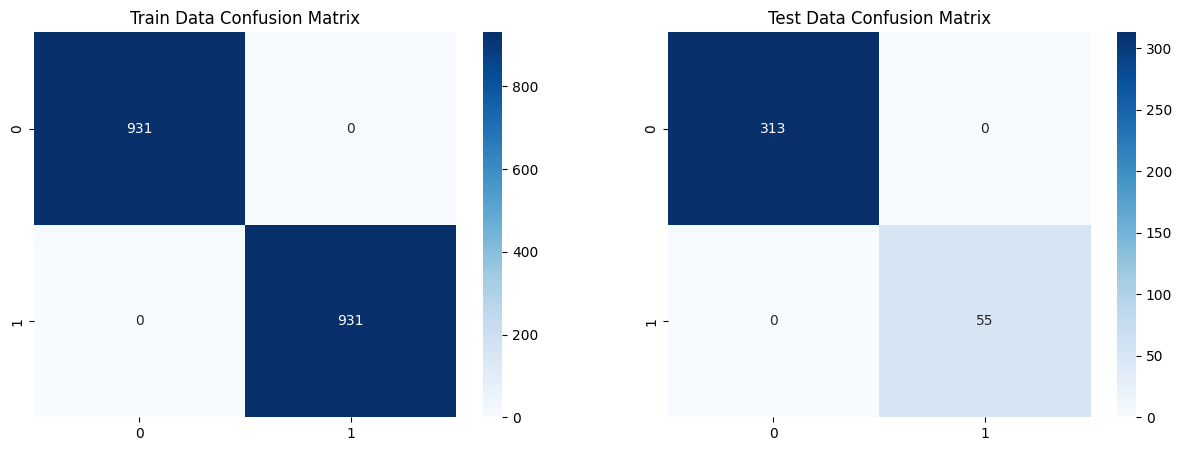

In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train_resampled,y_train_resampled)

y_train_pread = LR.predict(x_train_resampled)
y_test_pread = LR.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')